In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Basic

## Optimization

In [2]:
from scipy.optimize import minimize

Minimize $f(x) = (x-3)^2$

In [3]:
def f(x):
    return (x-3)**2

res = minimize(f, x0=2)
res.x

array([2.99999999])

Minimize $f(x, y) = (x-1)^2 + (y-2.5)^2$ subject to

$$x-2y+2 \geq 0 $$
$$-x-2y+6 \geq 0$$
$$-x + 2y + 2 \geq 0$$
$$x \geq 0 $$
$$y \geq 0 $$

<p align="center">
  <img src="../images/opt_reg.PNG" alt="drawing" width="300" align="center"/>
</p>

* 2D function takes in vector $x$
* Constraints must be specified as $g_i(x) \geq 0$
* Bounds specified as rectangular 

In [4]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
bnds = ((0, None), (0, None))
res = minimize(f, (2, 0), bounds=bnds, constraints=cons)

In [5]:
res.x

array([1.4, 1.7])

Note use of different techniques for different problems.

In [6]:
#minimize?

## Interpolation

Suppose you have the following data (I generate it here, but perhaps you collect $x$ and $y$ by means of some experiment)

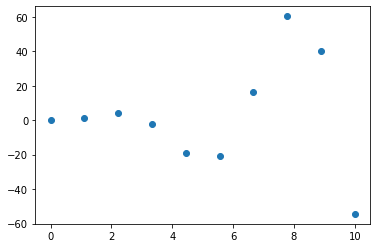

In [7]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

You want to know the values in between.

In [8]:
from scipy.interpolate import interp1d

In [9]:
f = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

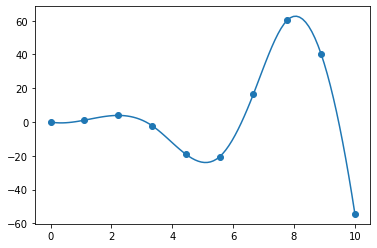

In [10]:
plt.plot(x_dense, y_dense)
plt.scatter(x, y)

## Curve Fitting

Trivial Example

In [11]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2

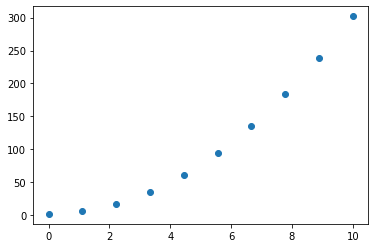

In [12]:
plt.scatter(x_data, y_data)

Want to fit the data to the curve $y = ax^2 + b$. The main goal here is determine the values of $a$ and $b$

In [13]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x**2 + b
popt, pcov = curve_fit(func, x_data, y_data, p0=(1,1))
popt

array([3., 2.])

The equation for spring motion is $y(t) = A\cos(\omega t+\phi)$. Want to find the natural frequency of oscillation $\omega$ for the spring. You collect the data

In [14]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

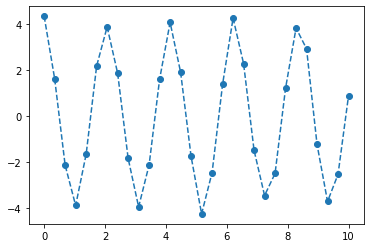

In [15]:
plt.plot(t_data,y_data,'o--')

$\omega = 2 \pi f$, $f=1/T$, and $T \approx 2$ seconds. Thus good initial guess is

* $\omega = 2 \pi (1/2) = \pi$
* $A=4$
* $\phi = 0$

In [16]:
from scipy.optimize import curve_fit

def func(x, A, w, phi):
    return A*np.cos(w*x+phi)

popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0))
popt

array([3.94836219, 2.9989952 , 0.10411352])

In [17]:
A, w, phi = popt

In [18]:
t = np.linspace(0, 10, 100)
y = func(t, A, w, phi)

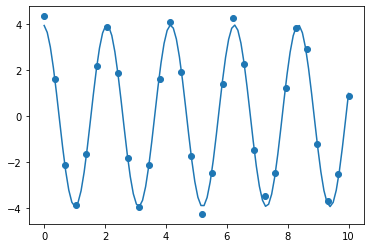

In [19]:
plt.scatter(t_data,y_data)
plt.plot(t,y)

The parameters

In [20]:
popt

array([3.94836219, 2.9989952 , 0.10411352])

The estimated error on the parameters

In [21]:
np.sqrt(np.diag(pcov))

array([0.05117448, 0.00430857, 0.02575702])